Retrieved Data:
    id    product  quantity
0    1  Product A        30
1    2  Product B        20
2    3  Product C        50
3    4  Product A        30
4    5  Product B        20
5    6  Product C        50
6    7  Product A        30
7    8  Product B        20
8    9  Product C        50
9   10  Product A        30
10  11  Product B        20
11  12  Product C        50
12  13  Product A        30
13  14  Product B        20
14  15  Product C        50
15  16  Product A        30
16  17  Product B        20
17  18  Product C        50


C:\Users\pushp\AppData\Local\Temp\ipykernel_20176\2119780648.py:27: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


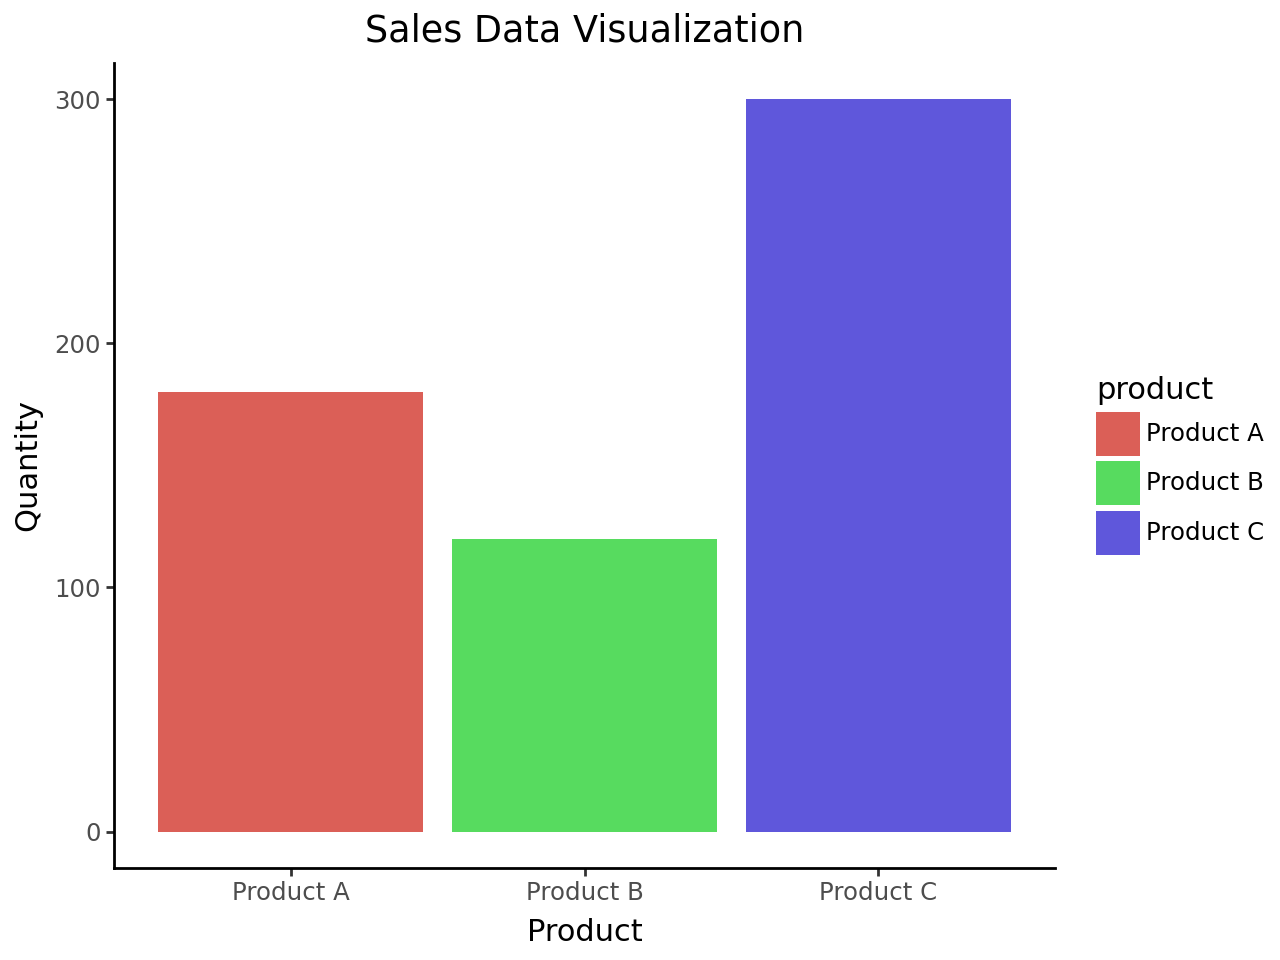

In [5]:
# visualize_data.py

import sqlite3
import pandas as pd
import plotnine as plt

def visualize_stored_data():
    # Connect to the SQLite database
    sqlite_conn = sqlite3.connect('sqlite_example.db')
    
    # Retrieve data from the database
    query = "SELECT * FROM sales"
    df = pd.read_sql_query(query, sqlite_conn)
    sqlite_conn.close()

    # Print the retrieved data
    print("Retrieved Data:")
    print(df)

    # Visualize data using Plotnine
    plot = (plt.ggplot(df, plt.aes(x='product', y='quantity', fill='product')) + \
            plt.geom_bar(stat='identity') + \
            plt.labs(title='Sales Data Visualization',
                 x='Product',
                 y='Quantity') + \
            plt.theme_classic())
    print(plot)

visualize_stored_data()

Retrieved Data:
     product  quantity
0  Product A        30
1  Product B        20
2  Product C        50


C:\Users\pushp\AppData\Local\Temp\ipykernel_20176\856194734.py:36: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


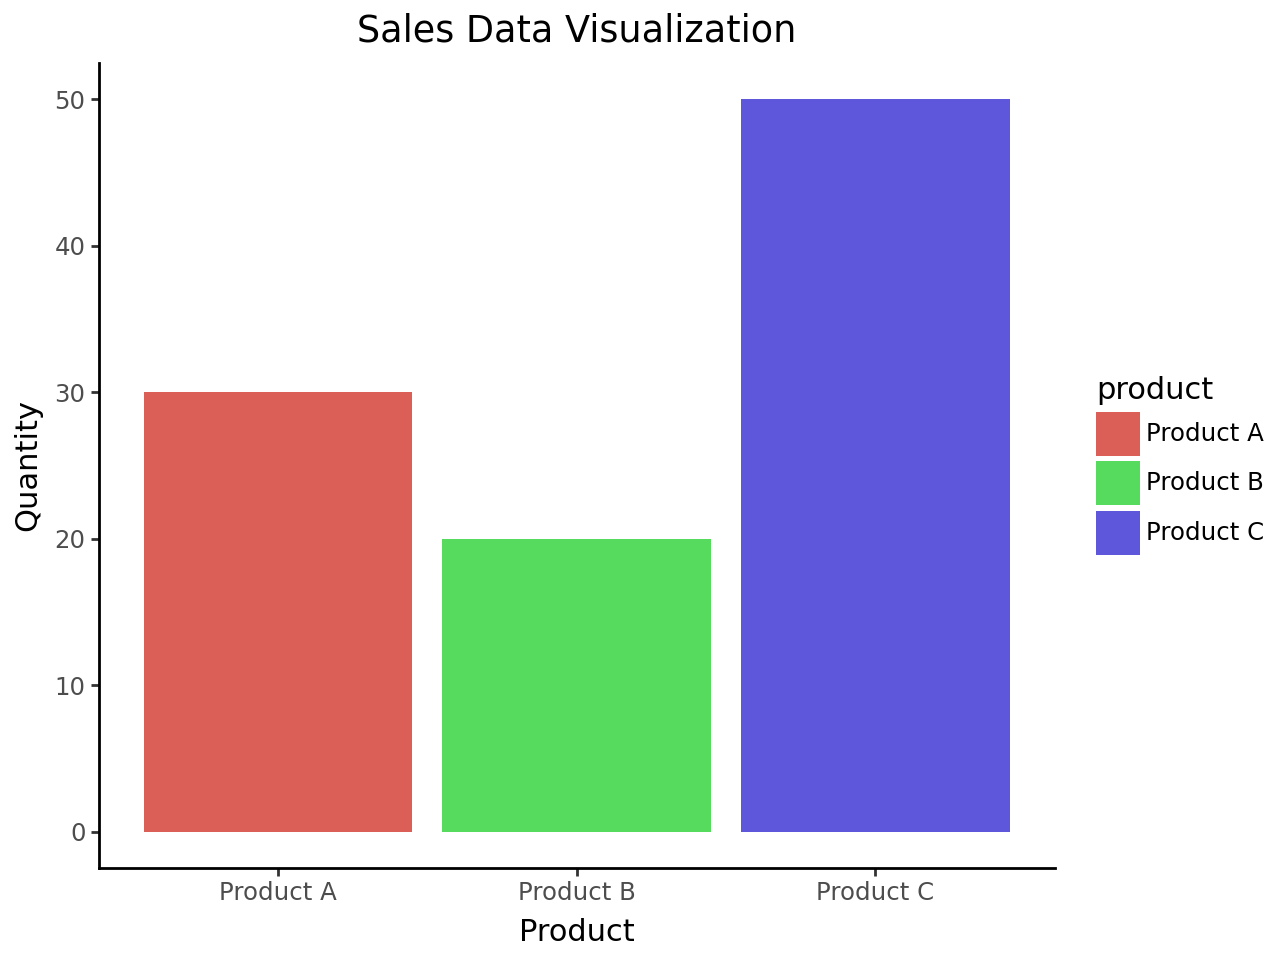

In [7]:

from pymongo import MongoClient
import pandas as pd
import plotnine as plt

def visualize_stored_data():
    # Connect to MongoDB
    client = MongoClient('mongodb://localhost:27017/')
    
    # Access the database
    db = client['sales_db']
    
    # Access the collection
    sales_collection = db['sales']

    # Retrieve data from the collection
    sales_data = list(sales_collection.find())
    
    # Convert to DataFrame
    df = pd.DataFrame(sales_data)

    # Drop the MongoDB ObjectId column if present
    if '_id' in df.columns:
        df.drop(columns=['_id'], inplace=True)

    # Print the retrieved data
    print("Retrieved Data:")
    print(df)

    # Visualize data using Plotnine
    plot = (plt.ggplot(df, plt.aes(x='product', y='quantity', fill='product')) + \
            plt.geom_bar(stat='identity') + \
            plt.labs(title='Sales Data Visualization',
                 x='Product',
                 y='Quantity') + \
            plt.theme_classic())
    print(plot)

    # Close the connection
    client.close()

visualize_stored_data()